<font color=green> Привет еще раз. Спасибо, что доделал работу. Мои комментарии к исправленным замечаниям будут выделены зеленым цветом. Нейтральные комментарии обозначу <font color=orange>оранжевым цветом</font>. Если же потребуется доработка некоторых пунктов проекта, то я отмечу это <font color=red>красным цветом. 
    
---

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Извини за задержку при проверке(

Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично, воспринимай их в качестве рекомендаций; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

# Определение перспективного тарифа для телеком компании
## Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание данных

### Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана
### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение
### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя
### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты - будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы. 

</div>

In [177]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st

import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col=0)
tariffs = pd.read_csv('/datasets/tariffs.csv')

## Шаг 1. Изучение общей информации

### Users

In [179]:
users.info()
print()
display(users.describe())
print()
users.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
292,1292,63,NaN,Красноярск,Веселина,Алексеенко,2018-02-21,ultra
325,1325,63,NaN,Новосибирск,Артём,Федосеев,2018-06-12,ultra
10,1010,26,NaN,Тюмень,Эдуард,Кононов,2018-08-05,smart
326,1326,37,NaN,Санкт-Петербург,Леонид,Барсуков,2018-05-29,smart
198,1198,26,NaN,Ярославль,Эдуард,Швецов,2018-08-15,smart
224,1224,58,NaN,Магнитогорск,Ахмет,Тарасов,2018-04-24,smart
400,1400,71,NaN,Москва,Ренат,Артёмов,2018-08-24,smart
222,1222,44,NaN,Уфа,Пётр,Булгаков,2018-08-30,ultra
347,1347,29,NaN,Москва,Лола,Фокина,2018-11-01,ultra
16,1016,58,NaN,Омск,Марица,Сазонова,2018-11-21,ultra


### Calls

In [180]:
calls.info()
print()
display(calls.describe())
print()
calls.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,id,call_date,duration,user_id
134862,1344_679,2018-09-23,8.30,1344
126913,1325_294,2018-07-08,13.72,1325
192599,1472_412,2018-08-12,9.51,1472
36204,1090_28,2018-10-21,11.27,1090
155021,1382_804,2018-11-15,13.46,1382
173474,1428_163,2018-11-30,3.79,1428
4384,1011_478,2018-09-11,4.63,1011
33596,1082_31,2018-11-28,2.62,1082
129658,1331_554,2018-10-25,15.82,1331
49508,1123_527,2018-11-28,0.43,1123


### Messages

In [181]:
messages.info()
print()
display(messages.describe())
print()
messages.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,id,message_date,user_id
23130,1096_410,2018-07-10,1096
16981,1076_130,2018-08-28,1076
87003,1359_16,2018-09-03,1359
96833,1396_484,2018-07-22,1396
88352,1369_277,2018-09-13,1369
49862,1222_66,2018-12-09,1222
22640,1094_88,2018-07-21,1094
80475,1335_387,2018-11-13,1335
108671,1436_165,2018-10-05,1436
108213,1433_820,2018-04-21,1433


### Internet

In [182]:
internet.info()
print()
display(internet.describe())
print()
internet.sample(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB



,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


,id,mb_used,session_date,user_id
44091,1152_309,0.00,2018-06-26,1152
14647,1052_18,0.00,2018-11-11,1052
51454,1175_107,326.78,2018-09-13,1175
109186,1373_108,482.34,2018-05-14,1373
48414,1168_182,876.51,2018-11-06,1168
299,1001_88,463.70,2018-11-30,1001
27195,1094_57,529.04,2018-08-17,1094
17676,1061_65,89.58,2018-09-26,1061
74010,1249_169,555.60,2018-12-10,1249
61962,1210_71,577.63,2018-10-30,1210


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Задав параметр index_col=0 метода read_csv, мы можем сделать данный столбец 'Unnamed: 0' индексом, коим он и является. 

</div>

Спасибо за подсказку!

### Tarifs

In [183]:
tariffs.info()
print()
display(tariffs.describe())
print()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Подумай также о возможных причинах появления ошибок в данных, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицы выполнен.

</div>

## Шаг 2. Подготовка данных

**Переводим даты из строки в тип datetime**

In [184]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [185]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [186]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [187]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


**Округляем минуты и гигабайты**

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Верно, что округление производится до суммирования. Это согласуется с тем, как оператор фиксирует выручку.

</div>

In [188]:
calls['duration'] = calls['duration'].apply(np.ceil)
display(calls.sample(20))
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
display(internet.sample(20))

,id,call_date,duration,user_id
27610,1067_520,2018-05-10,1.0,1067
159803,1394_208,2018-07-23,9.0,1394
52350,1130_638,2018-04-24,6.0,1130
73340,1185_134,2018-11-12,15.0,1185
90712,1227_132,2018-04-08,12.0,1227
112896,1290_74,2018-12-27,6.0,1290
34563,1086_112,2018-08-19,0.0,1086
67460,1171_485,2018-07-02,5.0,1171
76216,1189_884,2018-03-26,5.0,1189
102014,1262_371,2018-06-30,2.0,1262


,id,mb_used,session_date,user_id
69727,1238_319,435.0,2018-02-13,1238
7028,1024_83,709.0,2018-12-11,1024
15794,1055_252,497.0,2018-01-06,1055
95317,1322_18,803.0,2018-09-27,1322
56847,1189_286,282.0,2018-04-08,1189
106982,1363_28,298.0,2018-12-18,1363
18578,1064_297,122.0,2018-08-30,1064
17073,1059_79,0.0,2018-07-09,1059
147822,1495_24,721.0,2018-12-18,1495
92418,1312_273,510.0,2018-11-29,1312


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Таблицы на печать выводи с помощью метода display. print переводит данные в строку, а нам этого не надо. 

</div>

Переделал вывод таблиц с print() на display()

**Нужно ли убрать звонки с 0 продолжительностью?**

,duration,user_id
count,202607.000000,202607.000000
mean,7.158198,1253.940619
std,5.959173,144.722751
min,0.000000,1000.000000
25%,2.000000,1126.000000
50%,6.000000,1260.000000
75%,11.000000,1379.000000
max,38.000000,1499.000000


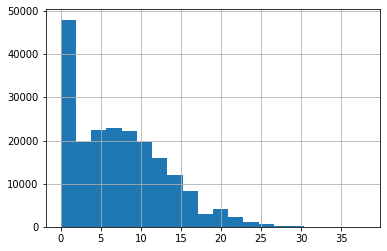

,duration,user_id
count,162994.000000,162994.000000
mean,8.897880,1254.149877
std,5.353761,144.751050
min,1.000000,1000.000000
25%,5.000000,1126.000000
50%,8.000000,1261.000000
75%,12.000000,1379.000000
max,38.000000,1499.000000


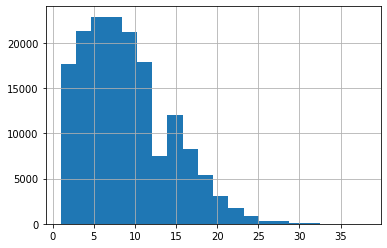

In [189]:
display(calls.describe())
calls['duration'].hist(bins=20)
plt.show()
print()
display(calls[calls['duration'] > 0].describe())
calls[calls['duration'] > 0]['duration'].hist(bins=20)
plt.show()

calls = calls[calls['duration'] > 0]

Как видно из графиков, звонков с продолжительностью 0 очень много, но эти записи портят характеристики, а именно среднее и медиану, т.к. для дальнейшего анализа эти данные не нужны, то лучше их отбросить. Это могут быть пропущенные звонки или сброщенные звонки. Те звонки звонки которые длились хотя бы одну секунду мы уже округлили в большую сторону.

<font color=green> Причина появления таких значений выскзаана. Их обработка произведена.  
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Исходя из какого предположения звонки с нулевой длительностью округлены до единицы? Стоит подробно описывать ход своих мыслей. Какова возможная причина их появления - недозвоны или что-то другое?

</div>

**Нужно ли убрать сессии с 0 продолжительностью?**

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.622098,1252.099842
std,278.387019,144.050823
min,0.000000,1000.000000
25%,139.000000,1130.000000
50%,349.000000,1251.000000
75%,560.000000,1380.000000
max,1725.000000,1499.000000


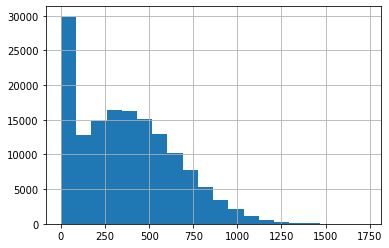

,mb_used,user_id
count,129798.000000,129798.000000
mean,426.581758,1253.046318
std,255.596114,143.782672
min,1.000000,1000.000000
25%,228.000000,1132.000000
50%,401.000000,1252.000000
75%,593.000000,1380.000000
max,1725.000000,1499.000000


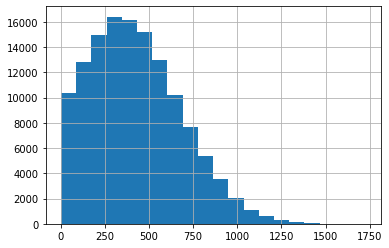

In [190]:
display(internet.describe())
internet['mb_used'].hist(bins=20)
plt.show()
print()
display(internet[internet['mb_used'] > 0].describe())
internet[internet['mb_used'] > 0]['mb_used'].hist(bins=20)
plt.show()

internet = internet[internet['mb_used'] > 0]

Как видно из графиков, инетрнет сессий с 0 mb очень много, но эти записи портят характеристики, а именно среднее и медиану, т.к. для дальнейшего анализа эти данные не нужны, то лучше их отбросить. Это могут быть сессии с маленьких количеством траффика или например из тех мест, где очень плохо ловит интернет. более значимые сессии мы уже округлили в большую сторону.

<font color=green> Причина также высказана. Только не забывать подписывать оси на графиках, а также делать им названия. 
    
---

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

В таблице с трафиком также содержится большое число нулевых значений в длинах сессий. Пойми причину их появления, исходя из которой обработай данные значения. 

</div>

Данные по траффику обработаны.

### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [191]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls_by_months = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum'])
calls_by_months.columns = ['calls_count', 'minutes_used']
calls_by_months.head(15)

calls_count  minutes_used
user_id month                           
1000    5               17         159.0
        6               28         172.0
        7               41         340.0
        8               42         408.0
        9               46         466.0
        10              44         350.0
        11              37         338.0
        12              38         333.0
1001    11              45         430.0
        12              47         414.0
1002    6               14         117.0
        7               21         214.0
        8               37         289.0
        9               25         206.0
        10              24         212.0

### Количество отправленных сообщений по месяцам

In [192]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages_by_months = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
messages_by_months.columns = ['messages_used']
messages_by_months.head(15)

messages_used
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11
        8                 13
        9                  4
        10                10
        11                16
        12                12

### Объем израсходованного интернет-трафика по месяцам

In [193]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet_by_months = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_by_months.columns = ['mbs_used']
internet_by_months['gbs_used'] = internet_by_months['mbs_used'] / 1024
# internet_by_months['gbs_used'] = internet['mb_used'].apply(np.ceil)
internet_by_months.head(15)

mbs_used   gbs_used
user_id month                     
1000    5        2256.0   2.203125
        6       23257.0  22.711914
        7       14016.0  13.687500
        8       14070.0  13.740234
        9       14581.0  14.239258
        10      14717.0  14.372070
        11      14768.0  14.421875
        12       9827.0   9.596680
1001    11      18452.0  18.019531
        12      14053.0  13.723633
1002    6       10871.0  10.616211
        7       17601.0  17.188477
        8       20347.0  19.870117
        9       16712.0  16.320312
        10      13905.0  13.579102

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Показатели расчитаны. Данные подготовлены к дальнейшим расчетам.

</div>

**Объединяем данные в единный dataframe для дальнейшего анализа** 

In [194]:
usage = calls_by_months.join(messages_by_months, how='outer')
usage = usage.join(internet_by_months, how='outer')
usage.fillna({'calls_count': 0, 'minutes_used': 0, 'messages_used': 0, 'mbs_used': 0}, inplace=True)

usage.reset_index(level='month', inplace=True)

users_usage = users.merge(usage, on='user_id')
users_usage.drop(['first_name', 'last_name'], axis=1, inplace=True)
users_usage.info()
users_usage.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 12 columns):
user_id          3214 non-null int64
age              3214 non-null int64
churn_date       187 non-null datetime64[ns]
city             3214 non-null object
reg_date         3214 non-null datetime64[ns]
tariff           3214 non-null object
month            3214 non-null int64
calls_count      3214 non-null float64
minutes_used     3214 non-null float64
messages_used    3214 non-null float64
mbs_used         3214 non-null float64
gbs_used         3201 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 326.4+ KB


,user_id,age,churn_date,city,reg_date,tariff,month,calls_count,minutes_used,messages_used,mbs_used,gbs_used
0,1000,52,NaT,Краснодар,2018-05-25,ultra,5,17.0,159.0,22.0,2256.0,2.203125
1,1000,52,NaT,Краснодар,2018-05-25,ultra,6,28.0,172.0,60.0,23257.0,22.711914
2,1000,52,NaT,Краснодар,2018-05-25,ultra,7,41.0,340.0,75.0,14016.0,13.687500
3,1000,52,NaT,Краснодар,2018-05-25,ultra,8,42.0,408.0,81.0,14070.0,13.740234
4,1000,52,NaT,Краснодар,2018-05-25,ultra,9,46.0,466.0,57.0,14581.0,14.239258
5,1000,52,NaT,Краснодар,2018-05-25,ultra,10,44.0,350.0,73.0,14717.0,14.372070
6,1000,52,NaT,Краснодар,2018-05-25,ultra,11,37.0,338.0,58.0,14768.0,14.421875
7,1000,52,NaT,Краснодар,2018-05-25,ultra,12,38.0,333.0,70.0,9827.0,9.596680
8,1001,41,NaT,Москва,2018-11-01,smart,11,45.0,430.0,0.0,18452.0,18.019531
9,1001,41,NaT,Москва,2018-11-01,smart,12,47.0,414.0,0.0,14053.0,13.723633


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Да, именно внешнее соединение нам и нужно в данном случае. Иначе в таблицу не попадут клиенты, которые не пользовались одним из видов услуг оператора в течение конкретного месяца. 

</div>

**Рассчёт помесячной выручки**

In [195]:
def monthly_revenue(row):
    tariff = row['tariff']

    tariff_data = tariffs[tariffs['tariff_name'] == tariff].iloc[0]
    total = tariff_data['rub_monthly_fee']

    minutes_over_tariff = row['minutes_used'] - tariff_data['minutes_included']
    if minutes_over_tariff > 0:
        total += minutes_over_tariff * tariff_data['rub_per_minute']
    
    messages_over_tariff = row['messages_used'] - tariff_data['messages_included']
    if messages_over_tariff > 0:
        total += messages_over_tariff * tariff_data['rub_per_message']

    internet_over_tariff = row['mbs_used'] - tariff_data['mb_per_month_included']
    if internet_over_tariff > 0:
        total += np.ceil(internet_over_tariff / 1024) * tariff_data['rub_per_gb']

    return total

users_usage['monthly_revenue'] = users_usage.apply(monthly_revenue, axis=1)
users_usage['monthly_revenue'] = users_usage['monthly_revenue'].astype('int')

In [196]:
users_usage.sample(10)

,user_id,age,churn_date,city,reg_date,tariff,month,calls_count,minutes_used,messages_used,mbs_used,gbs_used,monthly_revenue
643,1101,27,NaT,Казань,2018-05-21,smart,8,64.0,538.0,0.0,12866.0,12.564453,664
1571,1248,51,NaT,Москва,2018-05-28,smart,6,99.0,875.0,0.0,14993.0,14.641602,1675
2944,1458,36,NaT,Барнаул,2018-02-13,ultra,7,85.0,816.0,1.0,9978.0,9.744141,1950
1089,1172,40,NaT,Санкт-Петербург,2018-05-05,smart,9,52.0,460.0,10.0,22796.0,22.261719,2150
1719,1272,61,NaT,Пенза,2018-08-29,ultra,10,33.0,305.0,76.0,15800.0,15.429688,1950
1554,1245,32,NaT,Москва,2018-09-10,ultra,9,47.0,356.0,65.0,9477.0,9.254883,1950
517,1082,48,NaT,Москва,2018-10-05,smart,10,28.0,303.0,73.0,10980.0,10.722656,619
754,1118,65,NaT,Казань,2018-03-06,smart,10,69.0,581.0,0.0,16565.0,16.176758,1193
364,1057,43,NaT,Москва,2018-03-12,ultra,7,88.0,781.0,29.0,17257.0,16.852539,1950
1638,1259,33,NaT,Санкт-Петербург,2018-11-04,ultra,12,88.0,830.0,171.0,12150.0,11.865234,1950


<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Финальная таблица получена верным образом. Стоит убрать из нее излишнюю информацию в виде имени или фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит. Также выручку стоит сделать целочисленным показателем. 

</div>

Удалил колонки first_name, last_name. Monthly_revenue сделал целочисленными.

<font color=green> Теперь таблица содержит только необходимую для анализа информацию.
    
---

## Шаг 3. Анализ данных

In [197]:
users_usage_grouped_by_tariff = users_usage.pivot_table(index='tariff', values=['minutes_used', 'messages_used', 'gbs_used'], aggfunc={'mean', 'var', 'std'}).round(2)
users_usage_grouped_by_tariff

gbs_used              messages_used                 minutes_used  \
           mean   std    var          mean    std      var         mean   
tariff                                                                    
smart     15.86  5.72  32.75         33.38  28.23   796.81       417.93   
ultra     19.25  9.70  94.17         49.36  47.80  2285.27       526.62   

                           
           std        var  
tariff                     
smart   190.31   36219.32  
ultra   317.61  100873.63

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Здорово, что ты собрал всю информацию в единую таблицу. Также стоит привести и статистические показатели по выручке от тарифов. 

</div>

In [198]:
smart_users = users_usage[users_usage['tariff'] == 'smart']
ultra_users = users_usage[users_usage['tariff'] == 'ultra']

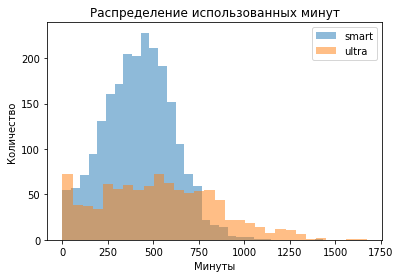

In [199]:
fig, ax = plt.subplots()
ax.hist(smart_users['minutes_used'], bins=30, alpha=0.5, label='smart')
ax.hist(ultra_users['minutes_used'], bins=30, alpha=0.5, label='ultra')
ax.set_title('Распределение использованных минут')
plt.xlabel('Минуты')
plt.ylabel('Количество')
plt.legend()
plt.show()

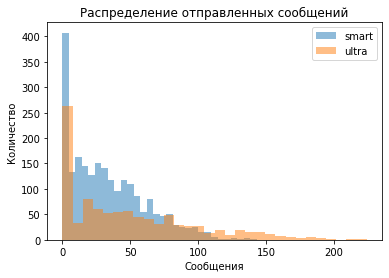

In [200]:
fig, ax = plt.subplots()
ax.hist(smart_users['messages_used'], bins=30, alpha=0.5, label='smart')
ax.hist(ultra_users['messages_used'], bins=30, alpha=0.5, label='ultra')
ax.set_title('Распределение отправленных сообщений')
plt.xlabel('Сообщения')
plt.ylabel('Количество')
plt.legend()
plt.show()

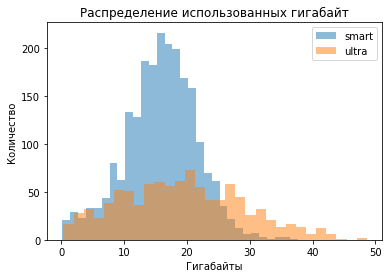

In [201]:
fig, ax = plt.subplots()
ax.hist(smart_users['gbs_used'], bins=30, alpha=0.5, label='smart')
ax.hist(ultra_users['gbs_used'], bins=30, alpha=0.5, label='ultra')
ax.set_title('Распределение использованных гигабайт')
plt.xlabel('Гигабайты')
plt.ylabel('Количество')
plt.legend()
plt.show()

In [202]:
monthly_revenue_by_tariff = users_usage.pivot_table(index='tariff', values='monthly_revenue', aggfunc=['sum', 'mean'])
monthly_revenue_by_tariff

,sum,mean
,monthly_revenue,monthly_revenue
tariff,,
smart,2885751,1294.63930
ultra,2040000,2071.06599


**Выводы:** судя по гистограммам и сводной таблице 99% пользователей тарифа ультра не выходят за пределы включенных в тариф минут и сообщений, в отличии от пользователей тарифа смарт. А использование интернета в обоих тарифах часто выходит за пределы тарифа, в случае тарифа смарт этот показатель больше.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Базовые статистические параметры получены. Приведены все необходимые графики. Здорово, что графики для одинаковых услуг тарифов приведены на одном рисунке. Так удобнее сравнивать тарифы. Также можно привести график по выручке компании с разбиением по тарифу, однако это есть ниже. 

</div>

## Шаг 4. Проверка гипотез

In [203]:
alpha = .05

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

H0 - средняя выручка пользователей тарифов равна

H1 - средняя выручка тарифов пользователей различается

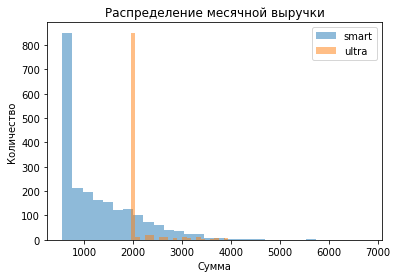

In [204]:
fig, ax = plt.subplots()
ax.hist(smart_users['monthly_revenue'], bins=30, alpha=0.5, label='smart')
ax.hist(ultra_users['monthly_revenue'], bins=30, alpha=0.5, label='ultra')
ax.set_title('Распределение месячной выручки')
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.legend()
plt.show()

Так как у нас две независимых выборки с диксретными величинами, распределение которых стремятся к нормальному, для проверки гипотезы мы используем критерий стъюдента.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Разве можно назвать распределения выше нормальными? Подумай, какое распределение будет описывать данные параметры. Также не забывай подписывать оси на графиках.

</div>

**Вопрос:** почему нельзя назвать распределение нормальным? По сути у нас нет хвоста слева, ведь стоимость тарифа это то откуда начинается распределение. Месячная выручка по тариффу не может быть меньше стоимости тариффа.

<font color=green> Распределение ГБ выше - это нормальное распределение, мы видим четкие контуры. То что нет левого хвоста уже говорит нам о том, что распределение не будет нормальным. Посмотри данное [распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5). Оно лучшим образом аппроксимирует полученные распределения. 
    
---

In [205]:
mean_revenue_by_tariff_test = st.ttest_ind(
    smart_users['monthly_revenue'], 
    ultra_users['monthly_revenue'])

print('p-значение:', mean_revenue_by_tariff_test.pvalue)

if (mean_revenue_by_tariff_test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


**Вывод:** p-value показывает нам, что нет оснований принять нулевую гипотезу. 

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Гипотезы сформулированы и проверены верно.

</div>

**Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

H0 - средняя выручка пользователей тарифов из Москвы и не из Москвы равна

H1 - средняя выручка пользователей тарифов из Москвы и не из Москвы различается

In [206]:
moscow_users = users_usage[users_usage['city'] == 'Москва']
not_moscow_users = users_usage[~(users_usage['city'] == 'Москва')]

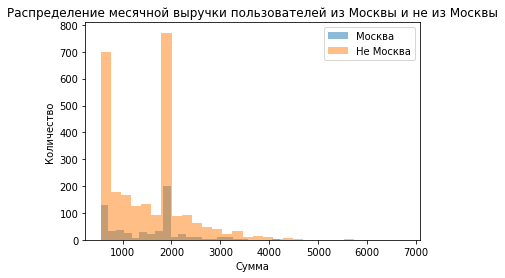

In [207]:
fig, ax = plt.subplots()
ax.hist(moscow_users['monthly_revenue'], bins=30, alpha=0.5, label='Москва')
ax.hist(not_moscow_users['monthly_revenue'], bins=30, alpha=0.5, label='Не Москва')
ax.set_title('Распределение месячной выручки пользователей из Москвы и не из Москвы')
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.legend()
plt.show()

Так как у нас две независимых выборки с диксретными величинами, распределение которых стремятся к нормальному, для проверки гипотезы мы также используем критерий стъюдента.

In [208]:
mean_revenue_from_moscow_by_tariff_test = st.ttest_ind(
    moscow_users['monthly_revenue'], 
    not_moscow_users['monthly_revenue'])

print('p-значение:', mean_revenue_from_moscow_by_tariff_test.pvalue)

if (mean_revenue_from_moscow_by_tariff_test.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p-value показывает нам, что нет оснований отвергнуть нулевую гипотезу. 

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Проверка второй гипотезы также выполнена без нареканий. 

</div>

## Шаг 5. Общий вывод

Проведя анализ данных и проверив гипотезы мы можем сделать вывод что тариф смарт принесет компании мегалайн больше прибыли, так как это более доступный тариф, его выбирают гораздо больше пользователей и эти пользователи чаще выходят за пределы тарифа, что приносит дополнительную прибыль, хоть и среднее значение прибыли у этого тарифа ниже, чем у тарифа ультра. Пользователи обоих тарифов чаще берут дополнительные гигабайты интернета, чем остальных услуг, а пользователи тарифа смарт ещё часто посылают сообщения, выйдя за пределы тарифа. Так же мы не смогли подтвердить гипотезу что, средняя выручка зависит от того в Москве находятся пользователи или нет.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы. Еще лучше будет, если приведешь рекомендации для компании по дальнейшим действиям. 

</div>

<font color=green> Помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
Посмотри виды распределений для непрерывных величин. Основных их видов не так много. Например, можешь сделать это [тут](https://www.matburo.ru/tv_spr_sub.php?p=3).
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Разберись с нулевыми значениями в таблице с трафиком, выскажи причину их появления. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>